In [3]:
import pandas as pd
import seaborn as SNS
import matplotlib.pyplot as plt

In [4]:
vgsales = pd.read_csv("vgsales.csv")

In [111]:
vgsales = vgsales.dropna(subset=['Year'])

In [113]:
vgsales['Year'] = vgsales['Year'].astype('int64')

In [137]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


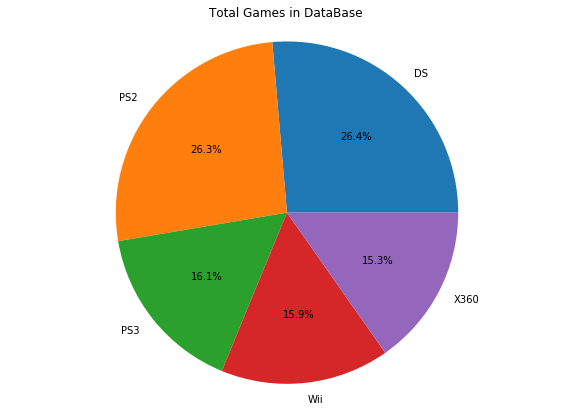

In [318]:
listplat = vgsales.Platform.value_counts()
listplat = listplat.head()
listplat

fig = plt.figure(figsize=(10,7))
plt.pie(listplat, labels=listplat.index, autopct='%1.1f%%')
fig = plt.gcf()
plt.axis('equal')
plt.title('Total Games in DataBase')
plt.show()

In [319]:
vgsales.Platform.value_counts().head()

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
Name: Platform, dtype: int64

In [147]:
sales_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
print('Total Sum of Sales')
print('-'*25)
for i in sales_list:
    print(i)
    print(vgsales[i].sum())
    print('-'*25)

Total Sum of Sales
-------------------------
NA_Sales
4333.43
-------------------------
EU_Sales
2409.1200000000003
-------------------------
JP_Sales
1284.3
-------------------------
Other_Sales
789.0100000000001
-------------------------
Global_Sales
8820.36
-------------------------


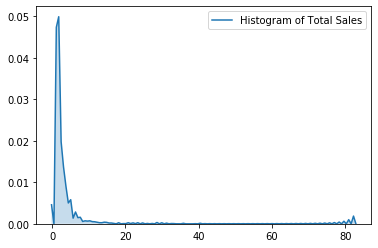

In [149]:
sns.kdeplot(vgsales['Global_Sales'], shade=True, label='Histogram of Total Sales')

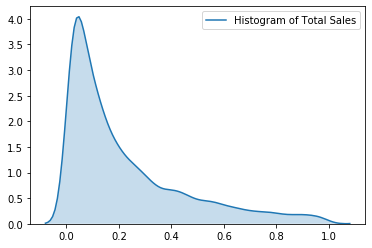

In [167]:
sns.kdeplot(vgsales['Global_Sales'][vgsales['Global_Sales']<1], shade=True, label='Histogram of Total Sales')

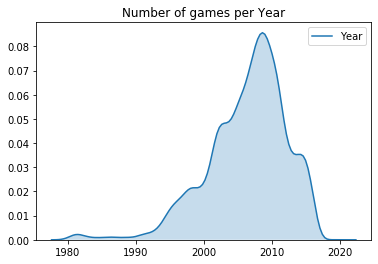

In [171]:
sns.kdeplot(data=vgsales['Year'], label='Year', shade=True)
plt.title('Number of games per Year')
plt.show()

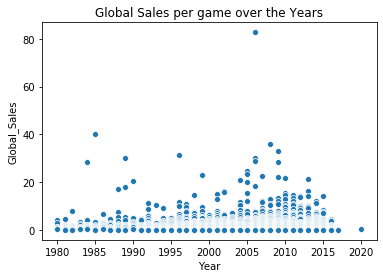

In [174]:
sns.scatterplot(data=vgsales, x='Year', y='Global_Sales')
plt.title('Global Sales per game over the Years')
plt.show()

In [220]:
list_of_platforms = list(vgsales['Platform'].value_counts().index)

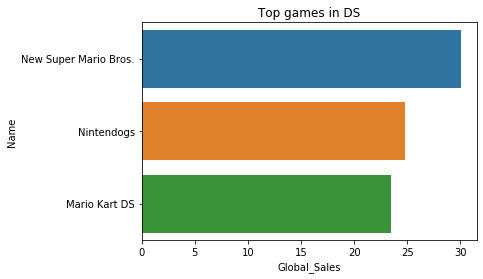

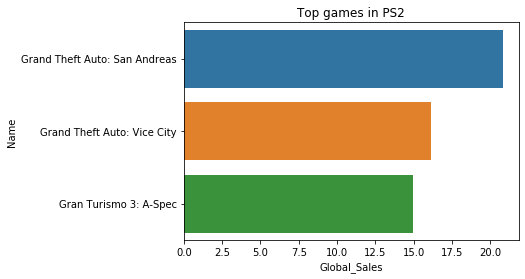

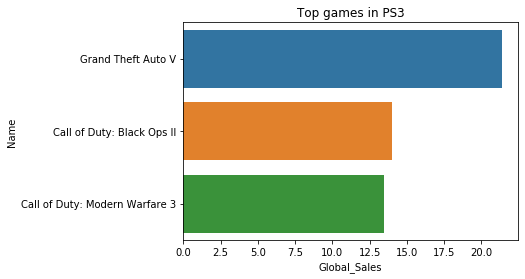

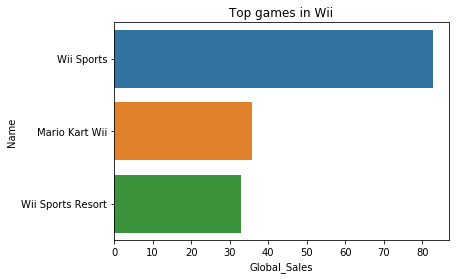

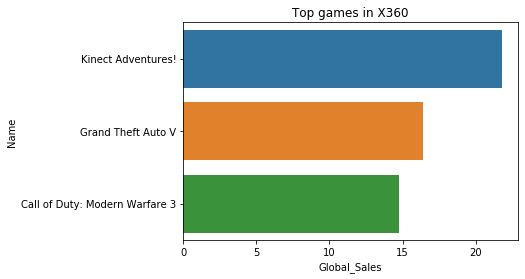

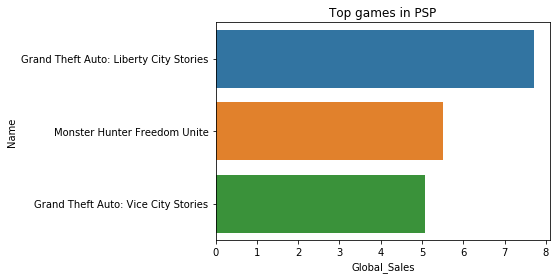

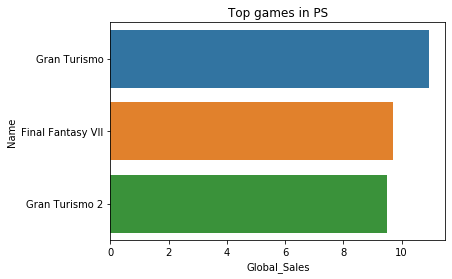

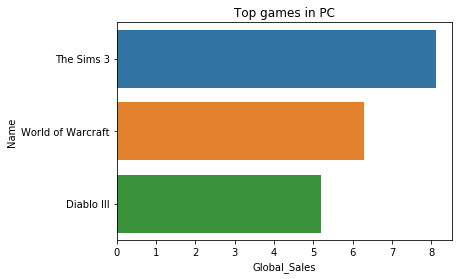

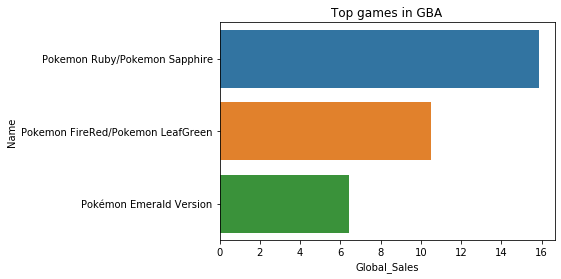

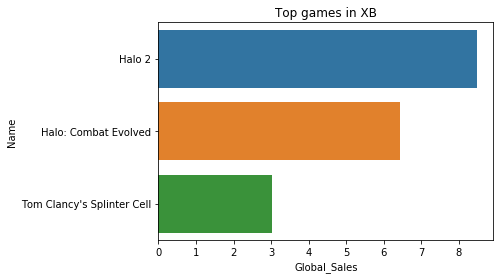

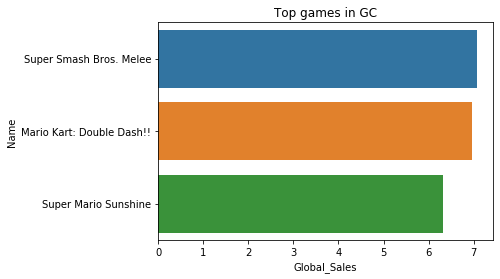

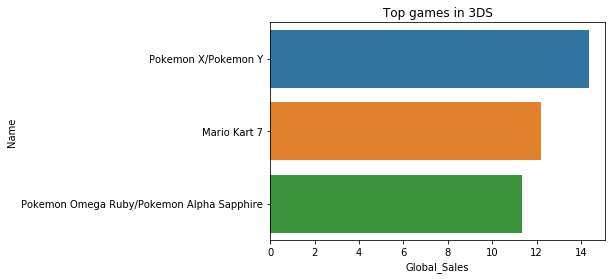

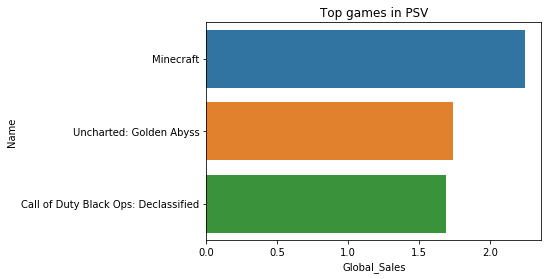

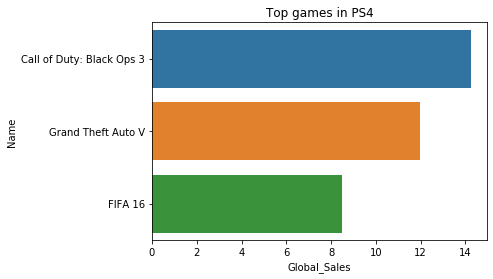

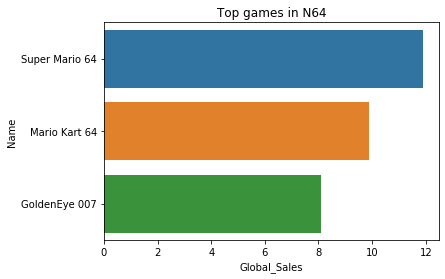

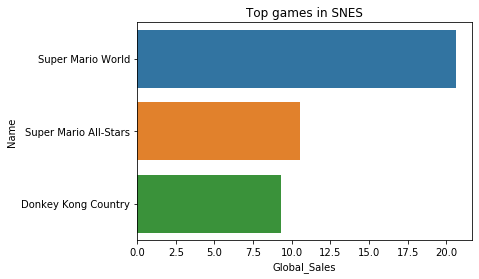

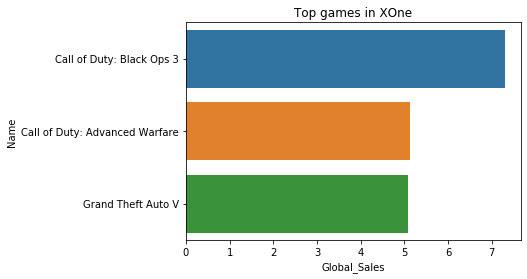

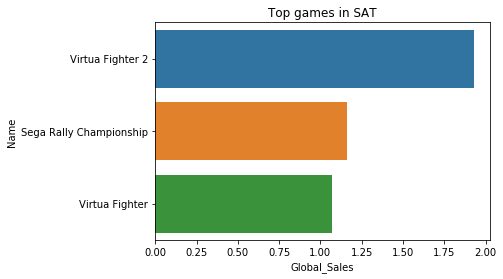

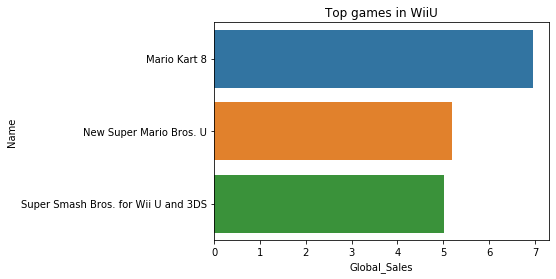

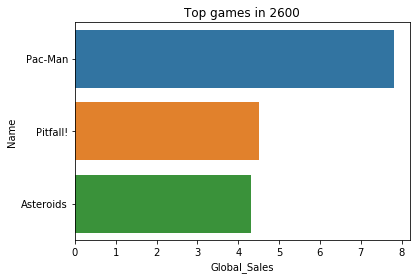

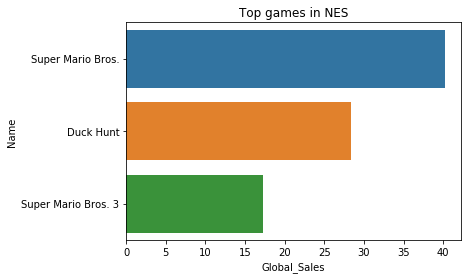

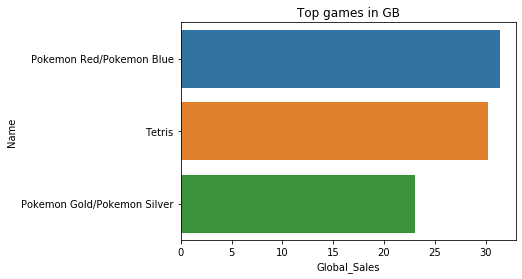

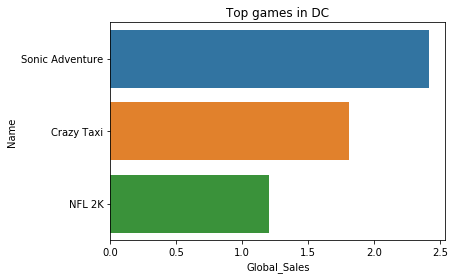

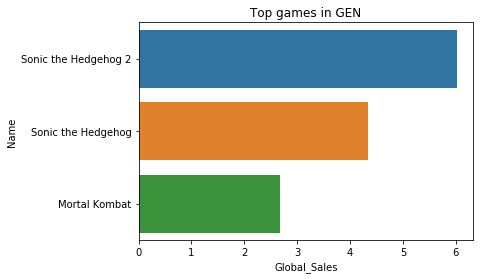

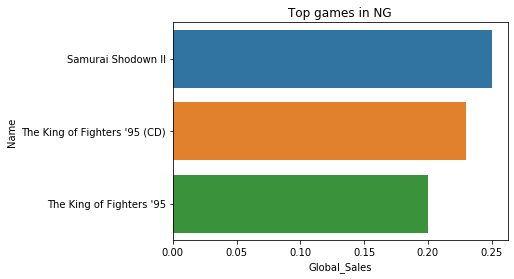

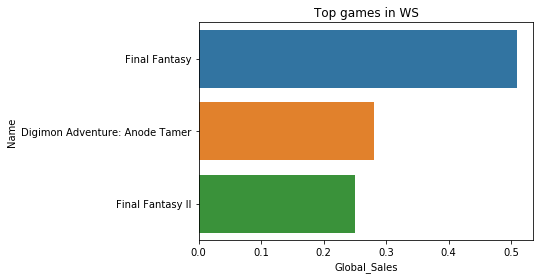

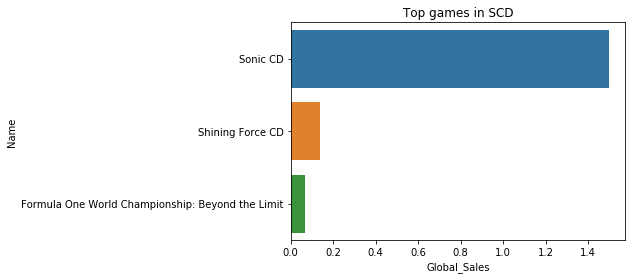

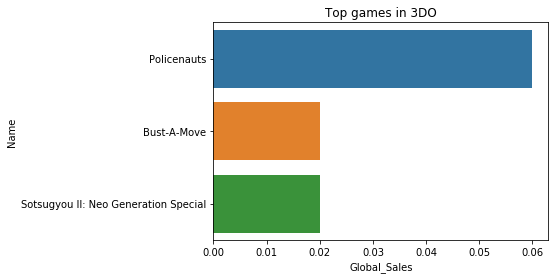

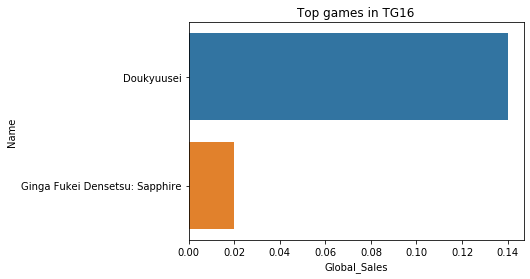

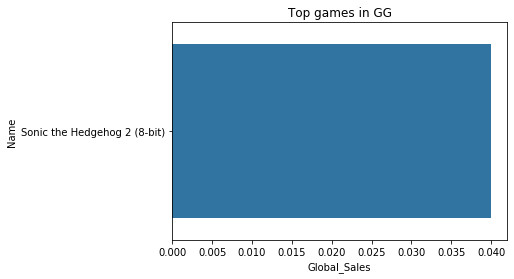

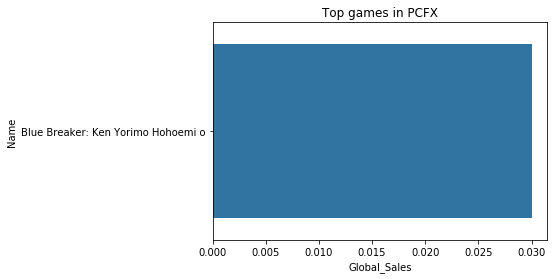

In [250]:
for platform in list_of_platforms:
    df = vgsales[vgsales['Platform']==platform]
    df = df.sort_values('Global_Sales', ascending=False)
    df = df.head(3)
    plt.figure()
    sns.barplot(data=df, x='Global_Sales', y='Name')
    plt.title('Top games in {}'.format(platform))
    plt.show()

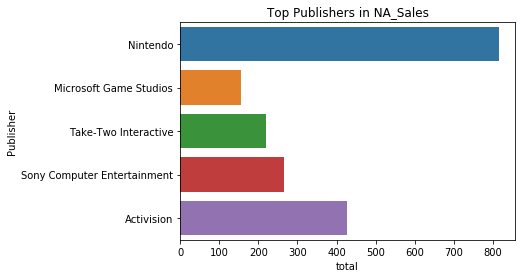

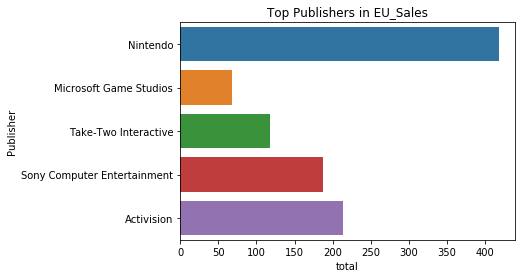

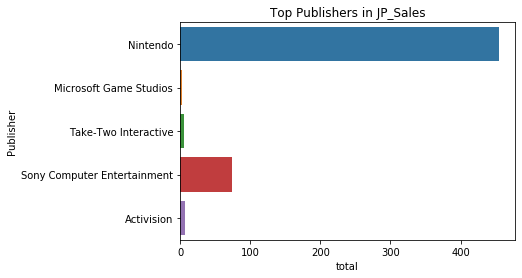

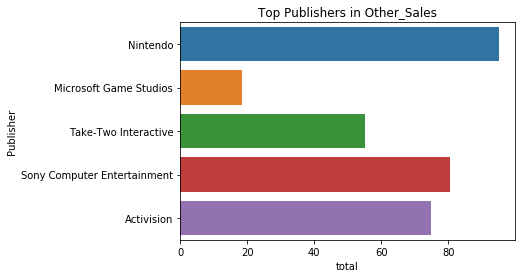

In [285]:
#Getting top publishers by NA Sales

list_of_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for region in list_of_regions:
    sales = vgsales.loc[:,['Publisher',region]]
    sales['total'] = sales.groupby('Publisher')[region].transform('sum')
    sales.drop(region,axis=1,inplace=True)
    sales = sales.drop_duplicates()
    sales.sort_values('total',ascending=False)
    sales = sales.head()
    
    plt.figure()
    sns.barplot(data=sales, x= 'total', y='Publisher')
    plt.title('Top Publishers in {}'.format(region))
    plt.show()
 

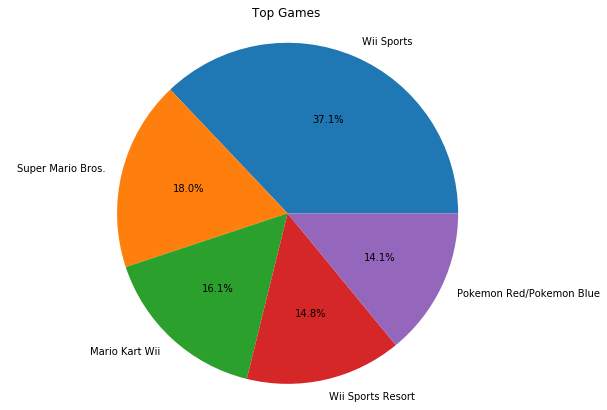

In [308]:
# game = vgsales.loc[:,['Name','Global_Sales']]
game = vgsales.head()

fig = plt.figure(figsize=(10,7))
plt.pie(game['Global_Sales'], labels=game['Name'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top Games')
plt.show()

In [321]:
vgsales[['Name','Global_Sales']].head()

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37


In [6]:
vgsales.Publisher.value_counts().head()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64

In [14]:
vgsales[vgsales['Publisher'] == 'Nintendo'].shape

(703, 11)